In [1]:
import torch 
from collections import Counter
import random
from datasets import load_dataset
import numpy as np
seed =3
random.seed(seed)
np.random.seed(seed)

task='mmlu'
tot_dataset_name='all_train'
model_name="meta-llama/Meta-Llama-3.1-8B-Instruct"
dataset_size =10000


DATASET_LIST = ['flan_v2', 'oasst1', 'wizardlm', 'dolly', 'stanford_alpaca'] #all_train
# DATASET_LIST = ['flan_v2'] #all_train


task_list = ["mmlu"]
infl_score_all_tasks= []
for task in task_list:
    infl_score_all = []
    for dataset_name in DATASET_LIST:
        root_path = f"less-outputs/selected_data/{task}/"
        infl_scores = torch.load(root_path + f"{dataset_name}_influence_score.pt")
        if  dataset_name == 'dolly':
            infl_scores = infl_scores[:-40]
        print(f"dataset: {dataset_name} shape: {infl_scores.shape}")

        infl_score_all.append(infl_scores)

    infl_score_all = torch.cat(infl_score_all, dim=0)
    # torch.save(infl_score_all, root_path + f"all_train_influence_score.pt")
    # infl_score_all_tasks.append(infl_score_all)

# infl_score_all_tasks = torch.cat(infl_score_all_tasks, dim=-1)
# values, indices = torch.topk(infl_score_all, k=dataset_size)

############################################################################################

# root_path = f"/home/azureuser/cloudfiles/code/Users/jinlong.pang/LADR_LLM_alignment_data_refinement/open-instruct/model_finetune_cluster/new_train_data/{model_name}/{tot_dataset_name}/"

# data = load_dataset('json', data_files=root_path + 'full_dataset.json')
# less_dataset = data['train'].select(indices)

# less_dataset.to_json(root_path + f"less-{dataset_size//1000}k_dataset.json")

/home/jlpang/Docta/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_3523174/3248510926.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weig

dataset: flan_v2 shape: torch.Size([100000])
dataset: oasst1 shape: torch.Size([33919])
dataset: wizardlm shape: torch.Size([100000])
dataset: dolly shape: torch.Size([15011])
dataset: stanford_alpaca shape: torch.Size([52002])


In [19]:

import torch 
from collections import Counter
import random
from datasets import load_dataset
import numpy as np
seed =3
random.seed(seed)
np.random.seed(seed)

DATASET_LIST = ['flan_v2', 'oasst1', 'wizardlm', 'dolly', 'stanford_alpaca'] #all_train


full_dataset = load_dataset("json", data_files="full_dataset.json")['train']
selected_dataset = load_dataset("json", data_files="gpt_filtered-cured-0.5_dataset.json")['train']

full_ids = full_dataset['id']
selected_ids = selected_dataset['id']

full_ids_index = {id: idx for idx, id in enumerate(full_ids)}
selected_idx = [full_ids_index.get(id, -1) for id in selected_ids]

In [20]:
len(selected_idx)

10000

In [21]:
full_dataset

Dataset({
    features: ['dataset', 'id', 'messages'],
    num_rows: 300932
})

In [11]:
selected_idx[-1]

300932

In [35]:
selected_infl_scores = infl_score_all.cpu().numpy()[selected_idx]
selected_infl_scores

array([0.06360804, 0.01709308, 0.03584141, ..., 0.04558882, 0.04280935,
       0.00786505], dtype=float32)

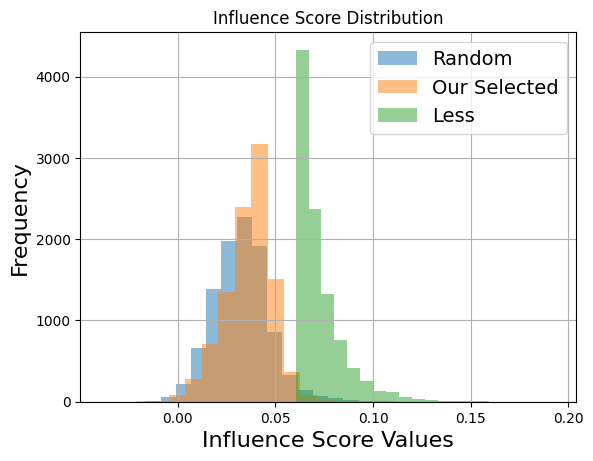

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import random

seed =3
random.seed(seed)
np.random.seed(seed)

less_infl_scores, indices = torch.topk(infl_score_all, k=dataset_size)
less_infl_scores = less_infl_scores.cpu().numpy()

full_infl_scores = infl_score_all.cpu().numpy()

random_indices = np.random.permutation(len(infl_score_all))[:dataset_size]
random_infl_scores = infl_score_all.cpu().numpy()[random_indices]

# 绘制直方图
# plt.hist(full_infl_scores, bins=20, color='lightgray', label='Full Scores')
plt.hist(random_infl_scores, bins=20, alpha=0.5, label='Random')

plt.hist(selected_infl_scores, bins=20, alpha=0.5, label='Our Selected')
plt.hist(less_infl_scores, bins=20, alpha=0.5, label='Less')


plt.title("Influence Score Distribution")
plt.xlabel("Influence Score Values", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.grid(True)
plt.legend(fontsize=14)
# 显示图表
plt.show()


In [28]:
np.mean(selected_infl_scores)

np.float32(nan)

tensor([   nan,    nan,    nan,  ..., 0.0603, 0.0603, 0.0603], device='cuda:0')

In [42]:
infl_score_all=infl_score_all.cpu().tolist().numpy()
selected_infl_scores = infl_score_all[selected_idx]
selected_infl_scores

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [29]:
full_dataset = load_dataset("json", data_files="full_dataset.json")['train']

full_ids = full_dataset['id']

In [32]:
selected_ids

['flan_v2_178',
 'flan_v2_460',
 'flan_v2_487',
 'flan_v2_10913',
 'flan_v2_11195',
 'flan_v2_12744',
 'flan_v2_20116',
 'flan_v2_20397',
 'flan_v2_20744',
 'flan_v2_22162',
 'flan_v2_28482',
 'flan_v2_28954',
 'flan_v2_30234',
 'flan_v2_30652',
 'flan_v2_32243',
 'flan_v2_32302',
 'flan_v2_32422',
 'flan_v2_32462',
 'flan_v2_34956',
 'flan_v2_36505',
 'flan_v2_38491',
 'flan_v2_38722',
 'flan_v2_40040',
 'flan_v2_40929',
 'flan_v2_47008',
 'flan_v2_48188',
 'flan_v2_48317',
 'flan_v2_48999',
 'flan_v2_51603',
 'flan_v2_52343',
 'flan_v2_52589',
 'flan_v2_52966',
 'flan_v2_52967',
 'flan_v2_53318',
 'flan_v2_53947',
 'flan_v2_54810',
 'flan_v2_54815',
 'flan_v2_55079',
 'flan_v2_55083',
 'flan_v2_55324',
 'flan_v2_55907',
 'flan_v2_56963',
 'flan_v2_64041',
 'flan_v2_64316',
 'flan_v2_64714',
 'flan_v2_65154',
 'flan_v2_65443',
 'flan_v2_65886',
 'flan_v2_66334',
 'flan_v2_66572',
 'flan_v2_66582',
 'flan_v2_68019',
 'flan_v2_69792',
 'flan_v2_70293',
 'flan_v2_73103',
 'flan_v2_73170'

In [30]:
full_ids

['flan_v2_0',
 'flan_v2_1',
 'flan_v2_2',
 'flan_v2_3',
 'flan_v2_4',
 'flan_v2_5',
 'flan_v2_6',
 'flan_v2_7',
 'flan_v2_8',
 'flan_v2_9',
 'flan_v2_10',
 'flan_v2_11',
 'flan_v2_12',
 'flan_v2_13',
 'flan_v2_14',
 'flan_v2_15',
 'flan_v2_16',
 'flan_v2_17',
 'flan_v2_18',
 'flan_v2_19',
 'flan_v2_20',
 'flan_v2_21',
 'flan_v2_22',
 'flan_v2_23',
 'flan_v2_24',
 'flan_v2_25',
 'flan_v2_26',
 'flan_v2_27',
 'flan_v2_28',
 'flan_v2_29',
 'flan_v2_30',
 'flan_v2_31',
 'flan_v2_32',
 'flan_v2_33',
 'flan_v2_34',
 'flan_v2_35',
 'flan_v2_36',
 'flan_v2_37',
 'flan_v2_38',
 'flan_v2_39',
 'flan_v2_40',
 'flan_v2_41',
 'flan_v2_42',
 'flan_v2_43',
 'flan_v2_44',
 'flan_v2_45',
 'flan_v2_46',
 'flan_v2_47',
 'flan_v2_48',
 'flan_v2_49',
 'flan_v2_50',
 'flan_v2_51',
 'flan_v2_52',
 'flan_v2_53',
 'flan_v2_54',
 'flan_v2_55',
 'flan_v2_56',
 'flan_v2_57',
 'flan_v2_58',
 'flan_v2_59',
 'flan_v2_60',
 'flan_v2_61',
 'flan_v2_62',
 'flan_v2_63',
 'flan_v2_64',
 'flan_v2_65',
 'flan_v2_66',
 'fla

In [18]:
selected_dataset['dataset']

['flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'flan_v2',
 'oasst1',
 'oas